#Análise de Dados: Lojas Sr. João

---

##Importação dos dados e bibliotecas

---


In [3]:
# Realizando a importação das bibliotecas que serão utilizadas
# A importação das bibliotecas necessárias para a manipulação de dados e a criação de gráficos.

import pandas as pd  # Biblioteca para manipulação e análise de dados (DataFrames, leitura de arquivos CSV, etc.)
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos (2D) com diversas personalizações.
import seaborn as sns  # Biblioteca baseada no Matplotlib, que fornece uma interface mais simples para gráficos estatísticos e mais bonitos.
import folium  # Biblioteca utilizada para criar mapas interativos com dados geográficos.
from folium.plugins import HeatMap  # Plugin do Folium para criação de mapas de calor, utilizado para representar a densidade de pontos em mapas.

In [4]:
# Especificando os caminhos dos arquivos CSVs
# URLs que apontam para os arquivos CSV contendo os dados de cada loja.
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Transformando os arquivos CSVs em DataFrames
# Utilizando a função pd.read_csv() para ler os arquivos CSV e transformar cada um em um DataFrame.
# Isso cria quatro DataFrames separados, um para cada loja.
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionando a coluna 'Loja' para identificação
# A coluna 'Loja' é adicionada a cada DataFrame para identificar a qual loja cada dado pertence.
# 'Loja 1' será associada aos dados de loja1, 'Loja 2' aos dados de loja2 e assim por diante.
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenando os 4 DataFrames em apenas um
# pd.concat() é utilizado para combinar os 4 DataFrames em um único DataFrame.
# A opção ignore_index=True reinicia o índice no DataFrame resultante, garantindo que a contagem de linhas seja sequencial.
df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Exibindo as primeiras linhas do DataFrame concatenado
# O método head() exibe as primeiras 5 linhas do DataFrame, permitindo uma visualização rápida do conteúdo.
df.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


##Análise do faturamento

---

###Faturamento Total por Loja

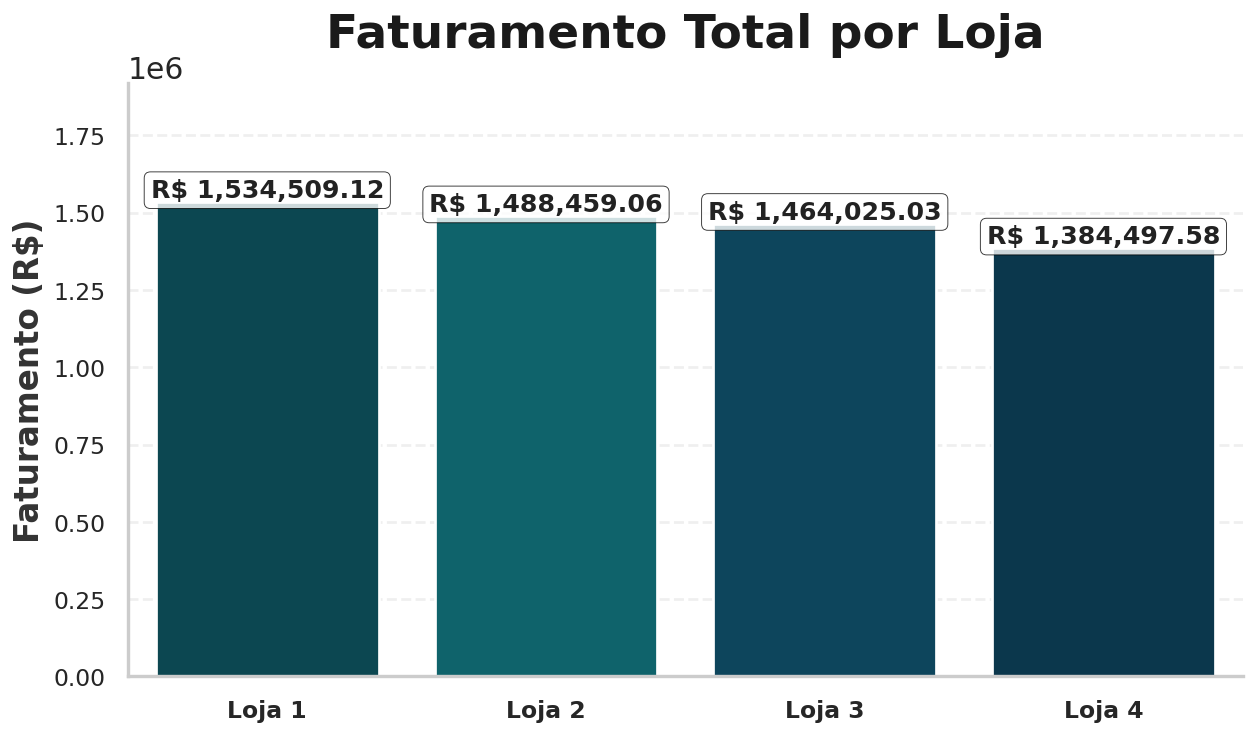

In [12]:
# Criar um DataFrame com o faturamento total de cada loja
faturamento_por_loja = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Preço': [
        loja1['Preço'].sum(),
        loja2['Preço'].sum(),
        loja3['Preço'].sum(),
        loja4['Preço'].sum()
    ]
})

# Estilo visual clean com fonte elegante
sns.set_theme(style="whitegrid", context='talk', font="DejaVu Sans")  # Define o tema do gráfico com fundo branco e grade sutil

# Criar figura com proporção widescreen e alta resolução
plt.figure(figsize=(10, 6), dpi=130)  # Define o tamanho e a resolução da figura para melhor visualização

# Paleta de cores ajustada para contrastar mais as lojas
cores = ['#004f5c', '#006f7a', '#004b69', '#003b57']  # Tons frios e contrastantes para diferenciação clara entre as lojas

# Criar o gráfico de barras
grafico = sns.barplot(
    data=faturamento_por_loja,  # DataFrame contendo os dados agregados por loja
    x='Loja',  # Nome da loja no eixo X
    y='Preço',  # Faturamento no eixo Y
    hue='Loja',  # Diferencia as barras por cor, com base nas lojas
    palette=cores,  # Paleta de cores definida anteriormente
    dodge=False,  # Mantém as barras agrupadas
    legend=False  # Desativa a legenda, pois o eixo X já diferencia as lojas
)

# Título com hierarquia e destaque visual
plt.title('Faturamento Total por Loja', fontsize=26, fontweight='bold', color='#1a1a1a', pad=20)  # Título principal do gráfico

# Eixo Y (Faturamento) formatado
plt.ylabel('Faturamento (R$)', fontsize=18, fontweight='bold', color='#333333')  # Rótulo descritivo do eixo Y
plt.xlabel('', fontsize=16)  # Remove o rótulo do eixo X (nome das lojas já estão visíveis nas categorias)

# Adicionar rótulos acima de cada barra com destaque visual
for bar in grafico.patches:
    valor = bar.get_height()  # Obtém o valor da altura da barra (faturamento)
    grafico.text(
        bar.get_x() + bar.get_width() / 2,  # Centraliza o texto horizontalmente sobre a barra
        valor + faturamento_por_loja['Preço'].max() * 0.01,  # Eleva o texto um pouco acima da barra
        f'R$ {valor:,.2f}',  # Formatação monetária do valor
        ha='center',  # Alinha o texto horizontalmente ao centro
        fontsize=14,  # Tamanho da fonte
        fontweight='bold',  # Negrito para melhor destaque
        color='#222222',  # Cor escura para contraste
        bbox=dict(boxstyle="round,pad=0.25", fc='white', ec='black', lw=0.5, alpha=0.8)  # Caixa de fundo branca com borda e leve transparência
    )

# Ajustar limites e aparência do gráfico
plt.ylim(0, faturamento_por_loja['Preço'].max() * 1.25)  # Define o limite superior do eixo Y com margem extra
plt.xticks(fontsize=13, fontweight='bold')  # Fonte para os rótulos do eixo X
plt.yticks(fontsize=13)  # Fonte para os rótulos do eixo Y
plt.grid(axis='y', linestyle='--', alpha=0.3)  # Adiciona linhas horizontais de grade para facilitar a leitura

# Remover bordas laterais
sns.despine()  # Remove as bordas superior e direita do gráfico para um visual mais limpo

# Layout final
plt.tight_layout()  # Ajusta o layout automaticamente para evitar sobreposição de elementos
plt.show()  # Exibe o gráfico na saída visual

###Faturamento das Lojas ao Longo do Tempo

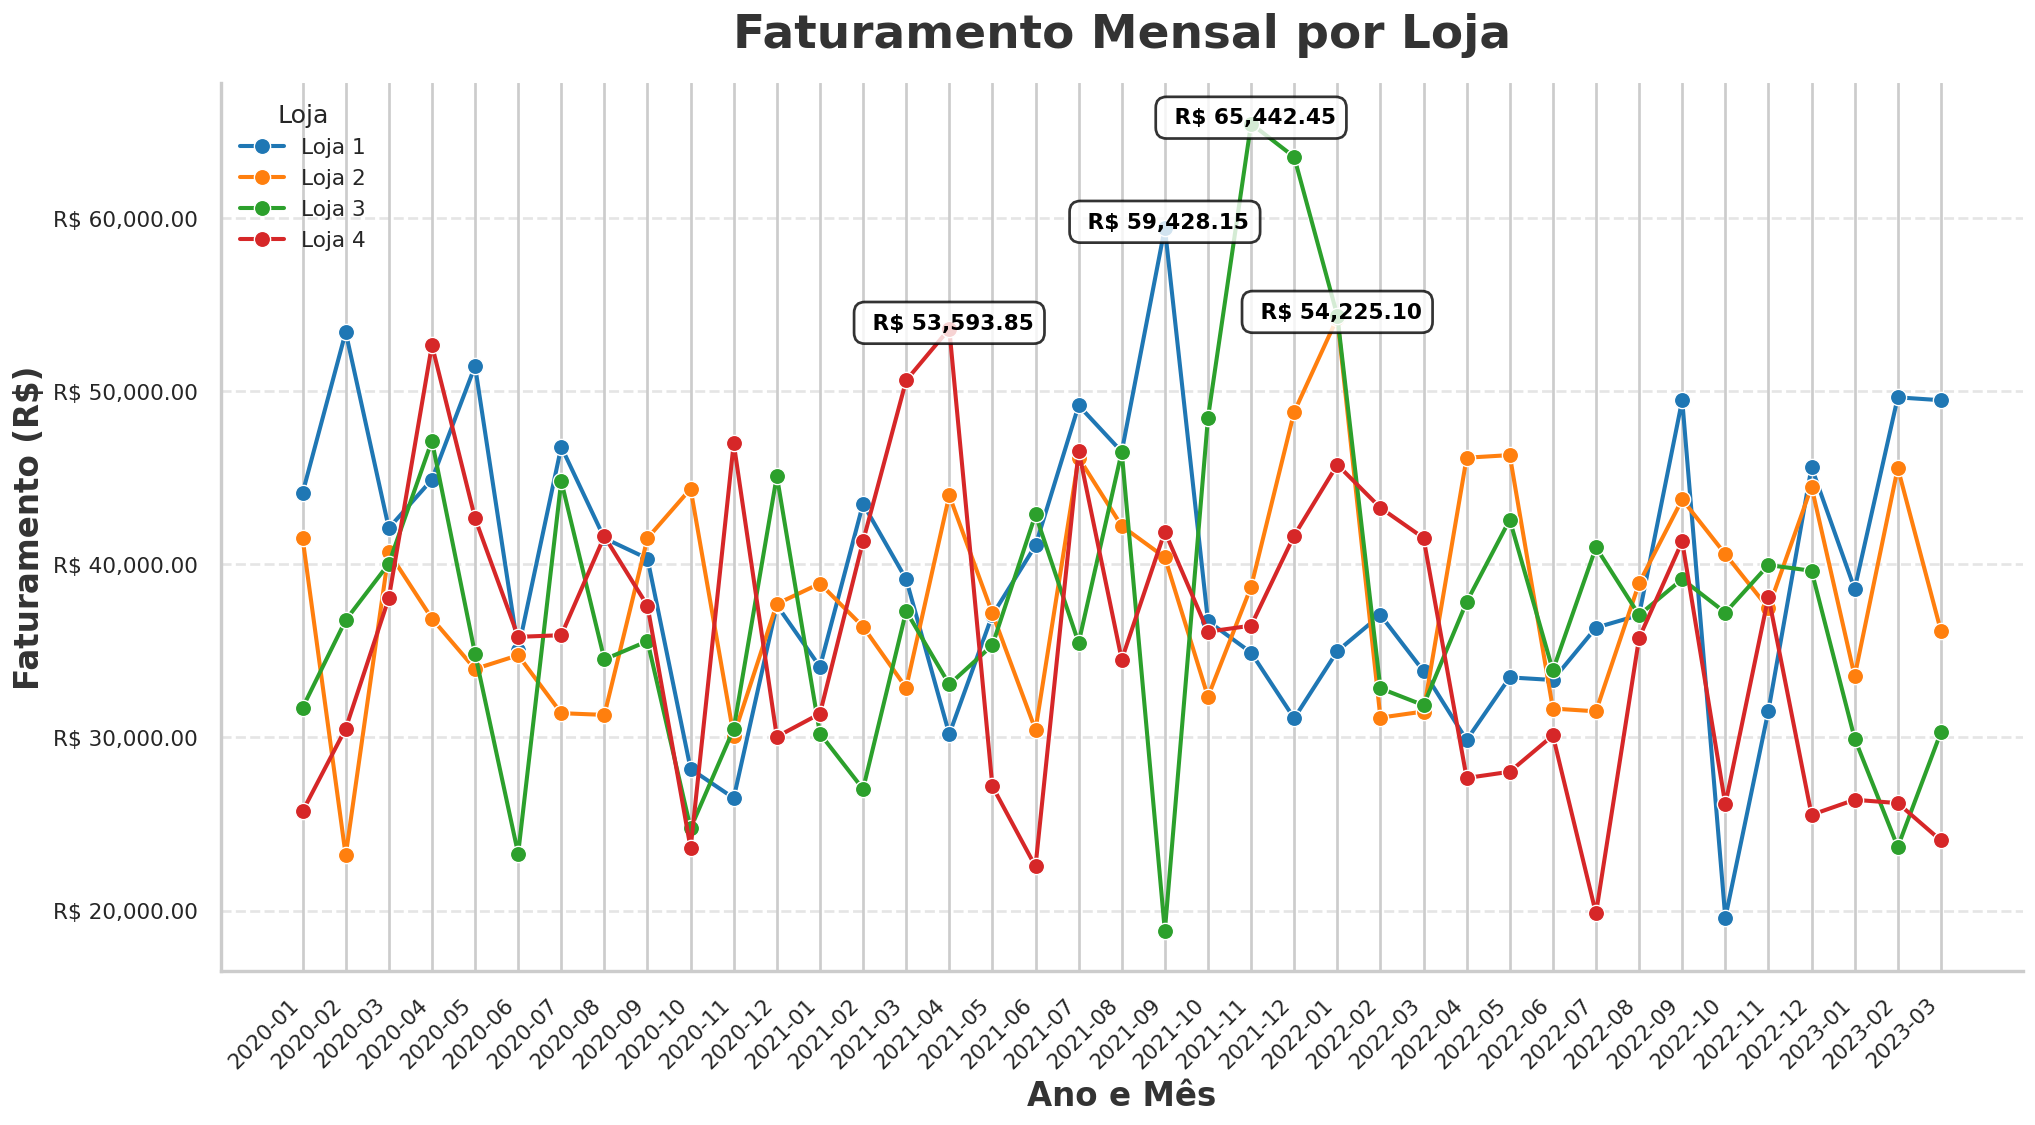

In [13]:
# Converter a coluna 'Data da Compra' para o formato datetime
# Utilizamos o método 'to_datetime' para garantir que a coluna 'Data da Compra' esteja no formato datetime.
# O parâmetro 'format' especifica o formato da data para garantir que a conversão seja feita corretamente.
df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], format='%d/%m/%Y')

# Agrupar o faturamento por mês e loja
# A coluna 'Data da Compra' é convertida para o formato de período mensal ('M') usando o método 'dt.to_period('M')',
# o que cria uma coluna 'Ano_Mês' representando o mês e ano da compra.
# Depois, a coluna 'Ano_Mês' é convertida para string para facilitar a manipulação em gráficos.
df['Ano_Mês'] = df['Data da Compra'].dt.to_period('M')
df['Ano_Mês'] = df['Ano_Mês'].astype(str)  # Convertendo para string

# Agrupar os dados por 'Ano_Mês' e 'Loja', somando o faturamento de cada loja por mês.
# O método 'groupby' permite agrupar as vendas por loja e por mês, somando os valores da coluna 'Preço'.
# O método 'reset_index' é utilizado para retornar os resultados como um DataFrame.
faturamento_mensal_loja = df.groupby(['Ano_Mês', 'Loja'])['Preço'].sum().reset_index()

# Criar o gráfico de linha para mostrar a tendência de faturamento por loja
# A função 'plt.figure' cria uma figura com tamanho ajustado para uma visualização mais ampla e melhor resolução.
plt.figure(figsize=(16, 9), dpi=130)

# Utiliza-se o gráfico de linha 'sns.lineplot' para plotar a evolução do faturamento ao longo do tempo (Ano_Mês),
# com diferentes linhas representando cada loja, diferenciadas pela cor, usando a paleta 'tab10' para cores harmônicas.
sns.lineplot(x='Ano_Mês', y='Preço', data=faturamento_mensal_loja, hue='Loja', marker='o', palette='tab10')

# Título do gráfico com uma hierarquia visual clara para destacar o assunto principal.
plt.title('Faturamento Mensal por Loja', fontsize=26, fontweight='bold', color='#333333', pad=20)

# Eixos com rótulos claros e formatados para garantir a legibilidade do gráfico.
# O eixo X representa os meses e o eixo Y representa o faturamento em R$.
plt.xlabel('Ano e Mês', fontsize=18, fontweight='bold', color='#333333')
plt.ylabel('Faturamento (R$)', fontsize=18, fontweight='bold', color='#333333')

# Ajustes nos rótulos do eixo X e Y para garantir boa legibilidade.
# A rotação de 45 graus nos rótulos do eixo X ajuda a visualizar as datas de forma mais clara.
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotação para melhor leitura dos meses
plt.yticks(fontsize=12)

# Formatação do eixo Y para exibir os valores de faturamento com separação de milhares e o símbolo monetário.
# A função 'FuncFormatter' é utilizada para formatar os valores do eixo Y com a moeda 'R$'.
plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, loc: f'R$ {x:,.2f}'))

# Incluir uma grid no eixo Y para melhorar a visualização das variações no faturamento.
# A grid é configurada para ser discreta (linha tracejada) e com opacidade ajustada.
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Melhorar a visibilidade da legenda, posicionando-a no canto superior esquerdo e removendo o fundo.
# O título da legenda é configurado para ser mais legível, e o texto da legenda também.
plt.legend(title='Loja', title_fontsize=14, fontsize=12, loc='upper left', frameon=False)

# Adicionar anotações para os picos de faturamento, destacando os valores máximos mensais para cada loja.
# A função 'plt.text' é utilizada para colocar as anotações nos picos de faturamento, com formatação visual.
for loja in faturamento_mensal_loja['Loja'].unique():
    loja_data = faturamento_mensal_loja[faturamento_mensal_loja['Loja'] == loja]
    max_faturamento = loja_data['Preço'].max()  # Encontrar o maior faturamento para a loja
    max_date = loja_data.loc[loja_data['Preço'] == max_faturamento, 'Ano_Mês'].values[0]  # Mês correspondente ao pico

    # Adicionar o valor de faturamento no pico, com um fundo branco e borda preta para destacar a anotação.
    plt.text(max_date, max_faturamento, f' R$ {max_faturamento:,.2f}',
             color='black', ha='center', fontsize=12, fontweight='bold',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle="round,pad=0.5", alpha=0.8))

# Ajustar a área do gráfico, removendo as bordas extras e ajustando o layout.
# A função 'sns.despine' remove as bordas laterais e superiores, para um gráfico mais limpo.
sns.despine()

# 'plt.tight_layout()' ajusta o layout final do gráfico para garantir que todos os elementos sejam exibidos corretamente,
# sem cortes ou sobreposições.
plt.tight_layout()

# Exibir o gráfico gerado.
plt.show()

##Vendas por Categoria

---

###Vendas por Categoria em cada Loja

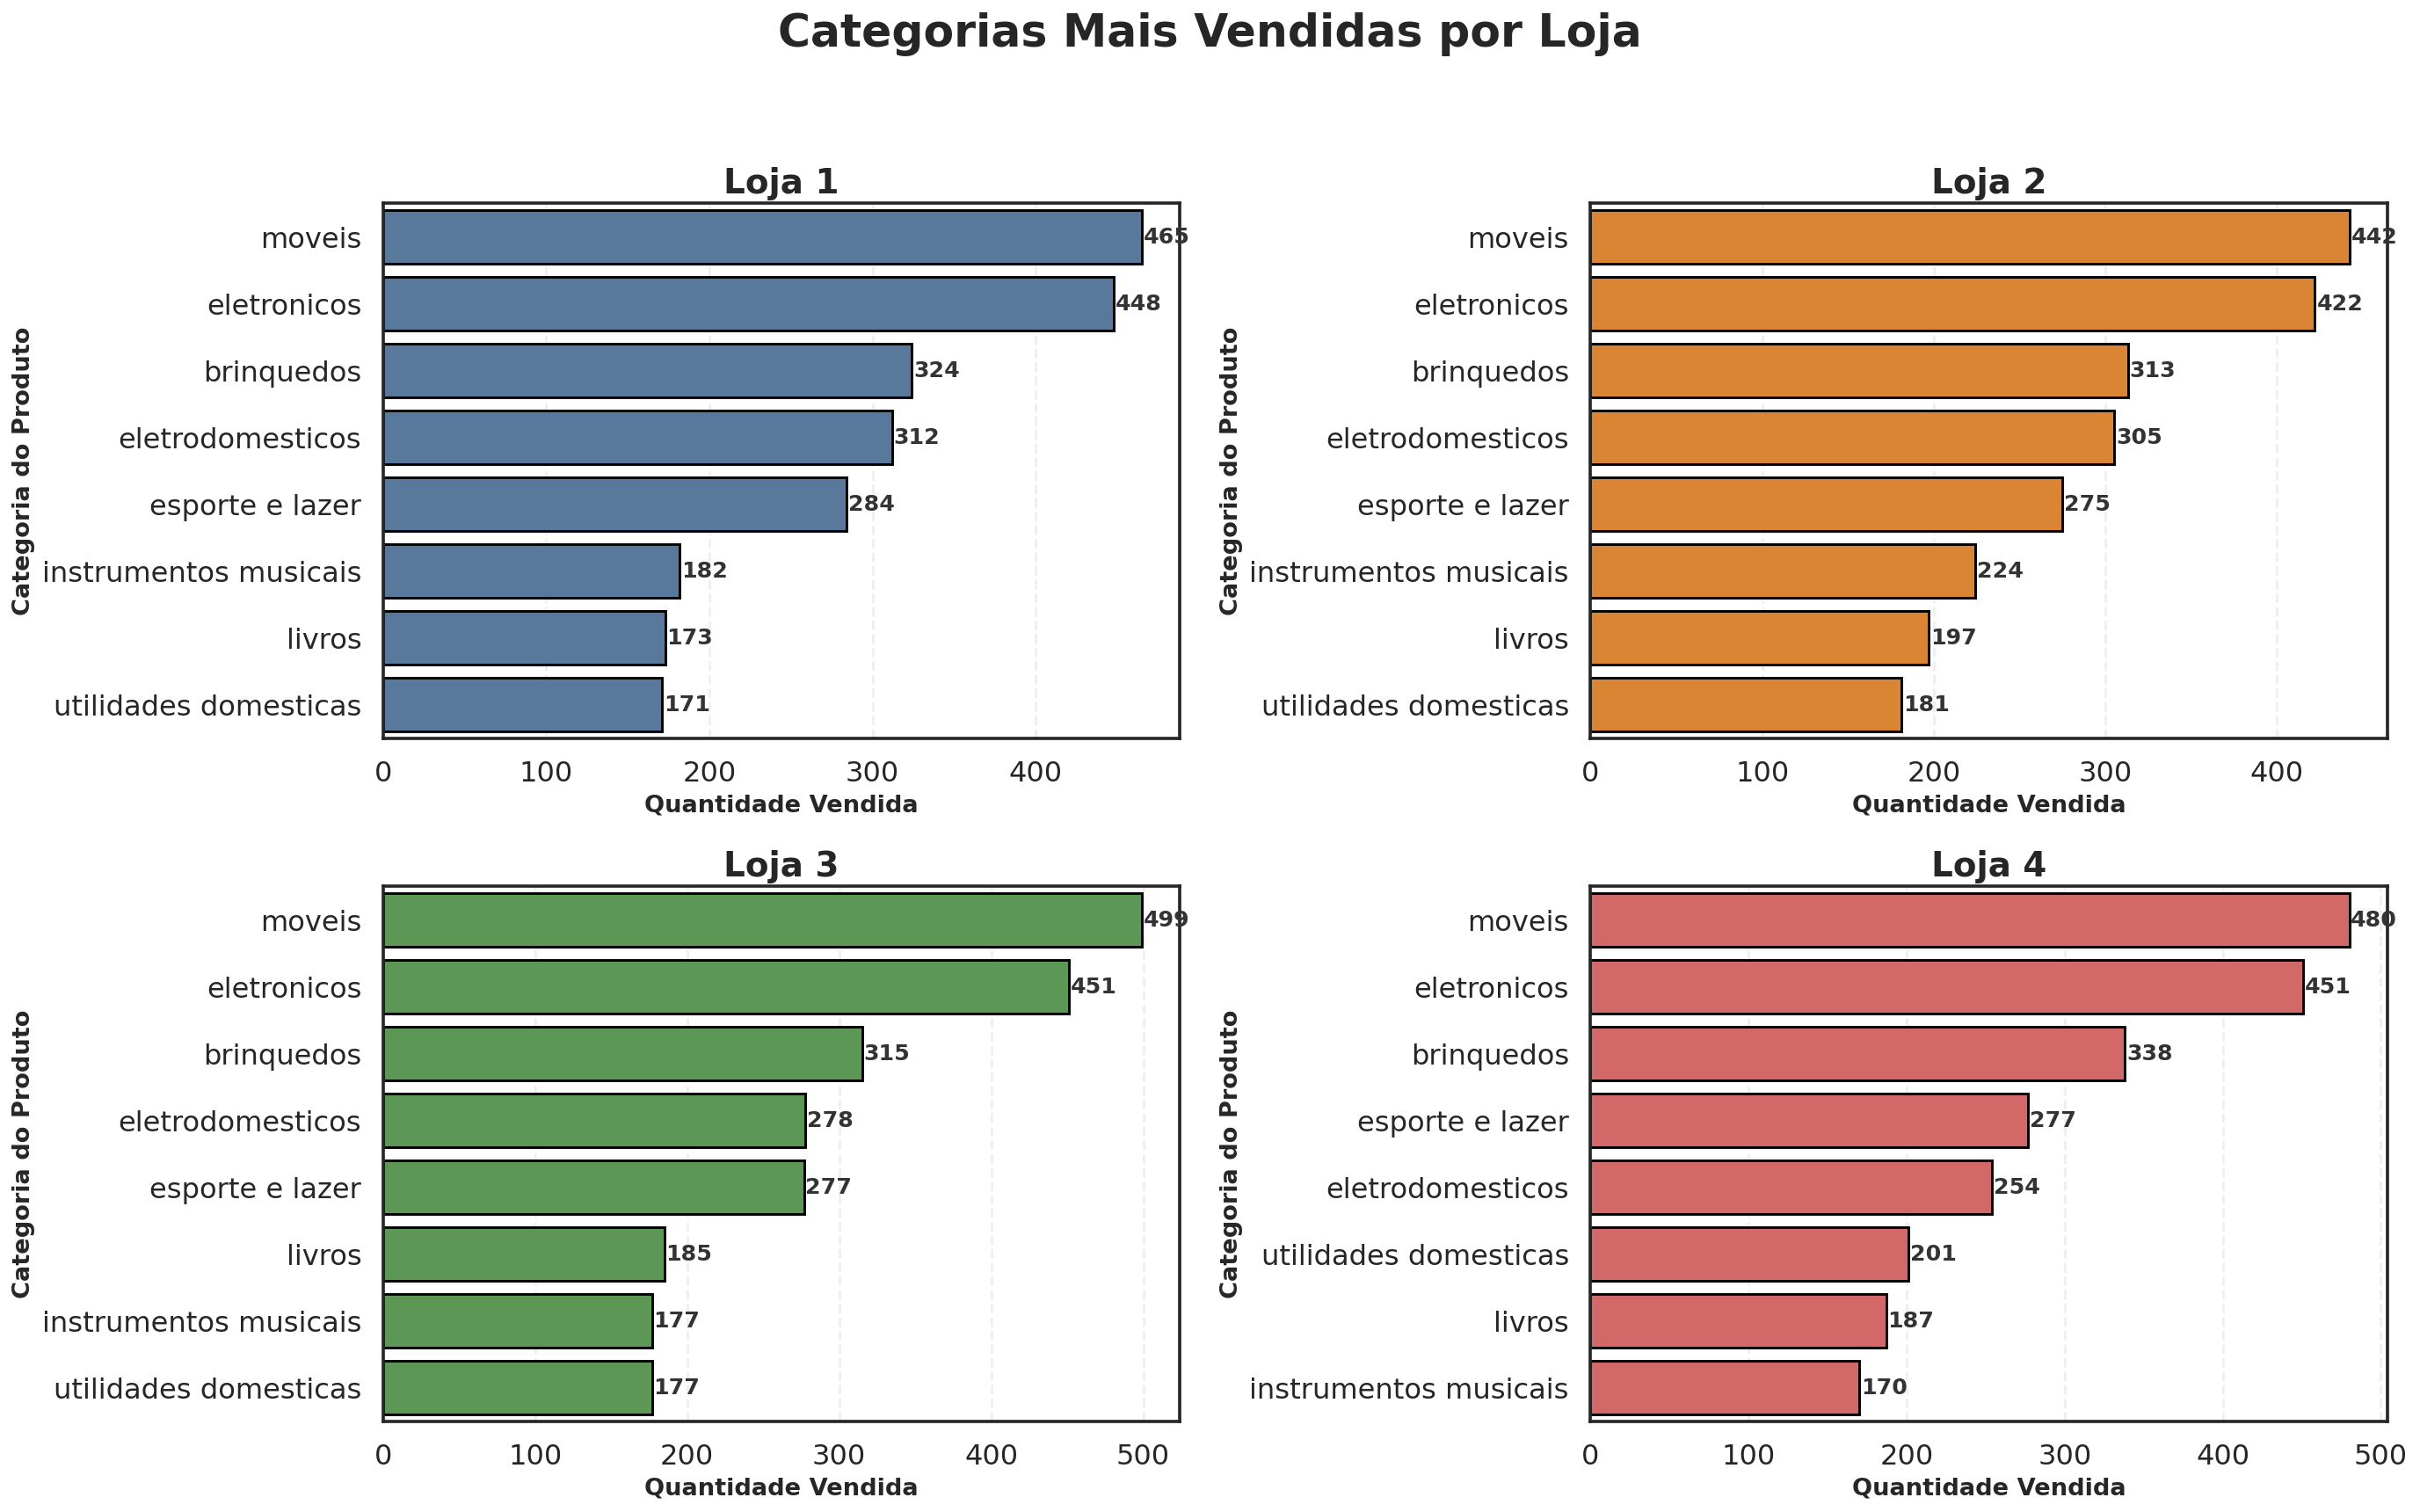

In [17]:
# Criar um dicionário para armazenar os DataFrames de contagem por loja
categorias_por_loja = {}

# Iterar sobre cada DataFrame de loja e seu nome correspondente
# O zip cria pares de (DataFrame da loja, nome da loja)
for df_loja, nome in zip([loja1, loja2, loja3, loja4], ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']):
    # Contar a quantidade de produtos vendidos por categoria usando value_counts
    # O value_counts retorna a contagem de cada categoria de produto no DataFrame da loja
    categorias = df_loja['Categoria do Produto'].value_counts().reset_index()

    # Renomear as colunas para tornar os resultados mais compreensíveis
    # A primeira coluna será 'Categoria', e a segunda 'Quantidade Vendida'
    categorias.columns = ['Categoria', 'Quantidade Vendida']

    # Armazenar o DataFrame resultante no dicionário com a chave sendo o nome da loja
    categorias_por_loja[nome] = categorias

# Estilo visual refinado para os gráficos
sns.set_theme(style="white", context="talk", font="DejaVu Sans")

# Criar uma figura com uma grade 2x2 para visualização em widescreen
# O tamanho da figura foi ajustado para garantir clareza nos detalhes
fig, axs = plt.subplots(2, 2, figsize=(20, 12), dpi=140)

# Título geral do gráfico com formatação destacada
# O 'y=1.03' é usado para ajustar a posição do título para evitar sobreposição com o gráfico
fig.suptitle('Categorias Mais Vendidas por Loja', fontsize=26, fontweight='bold', y=1.03)

# Lista das lojas a serem analisadas
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Lista de cores personalizadas para cada loja, garantindo distinção visual
cores = ['#4c78a8', '#f58518', '#54a24b', '#e45756']

# Transformar a grade de subplots em um vetor unidimensional para iterar mais facilmente
axes = axs.ravel()

# Loop para iterar sobre as lojas e seus respectivos dados
for i, loja in enumerate(lojas):
    # Acessa os dados de categorias por loja
    dados = categorias_por_loja[loja]

    # Criar o gráfico de barras (barplot) para cada loja
    # `hue='Categoria'` colore as barras de acordo com a categoria do produto
    # `palette` aplica uma cor única por loja, que é configurada previamente
    # `edgecolor='black'` adiciona bordas para destacar as barras
    grafico = sns.barplot(
        data=dados,
        y='Categoria',  # Define as categorias no eixo y
        x='Quantidade Vendida',  # Define as quantidades no eixo x
        hue='Categoria',  # Adiciona o hue para colorir as barras por categoria
        palette=[cores[i]] * len(dados),  # Aplica a cor personalizada por loja
        edgecolor='black',  # Adiciona bordas finas nas barras para maior contraste
        ax=axes[i],  # Especifica o eixo em que o gráfico será desenhado
        legend=False      # Desativa a legenda, já que ela é desnecessária nesse caso
    )

    # Título individual de cada subplot, indicando a loja
    axes[i].set_title(loja, fontsize=20, fontweight='bold')

    # Ajuste da escala dos eixos para maior clareza
    axes[i].set_xlabel('Quantidade Vendida', fontsize=14, fontweight='bold')  # Rótulo do eixo X
    axes[i].set_ylabel('Categoria do Produto', fontsize=14, fontweight='bold')  # Rótulo do eixo Y

    # Ativa a grid no eixo X, com linha tracejada e opacidade reduzida
    axes[i].grid(axis='x', linestyle='--', alpha=0.3)

    # Adiciona os valores das quantidades vendidas nas barras para melhor visualização
    # Cada barra terá seu valor exibido ao lado para facilitar a leitura
    for bar in grafico.patches:
        valor = bar.get_width()  # Obtém o valor da quantidade vendida (largura da barra)
        grafico.text(
            valor + 1,  # Posiciona o texto um pouco à direita da barra
            bar.get_y() + bar.get_height() / 2,  # Centraliza o texto verticalmente na barra
            f'{int(valor)}',  # Exibe o valor como inteiro
            ha='left',  # Alinha o texto à esquerda da barra
            va='center',  # Alinha o texto ao centro da barra verticalmente
            fontsize=13,  # Tamanho da fonte do texto
            fontweight='bold',  # Negrito para destacar os valores
            color='#333333'  # Cor do texto
        )

# Ajuste do layout para garantir que os subgráficos não se sobreponham e que o gráfico esteja bem posicionado
plt.tight_layout()

# Exibe o gráfico
plt.show()

###Vendas por Categoria Geral

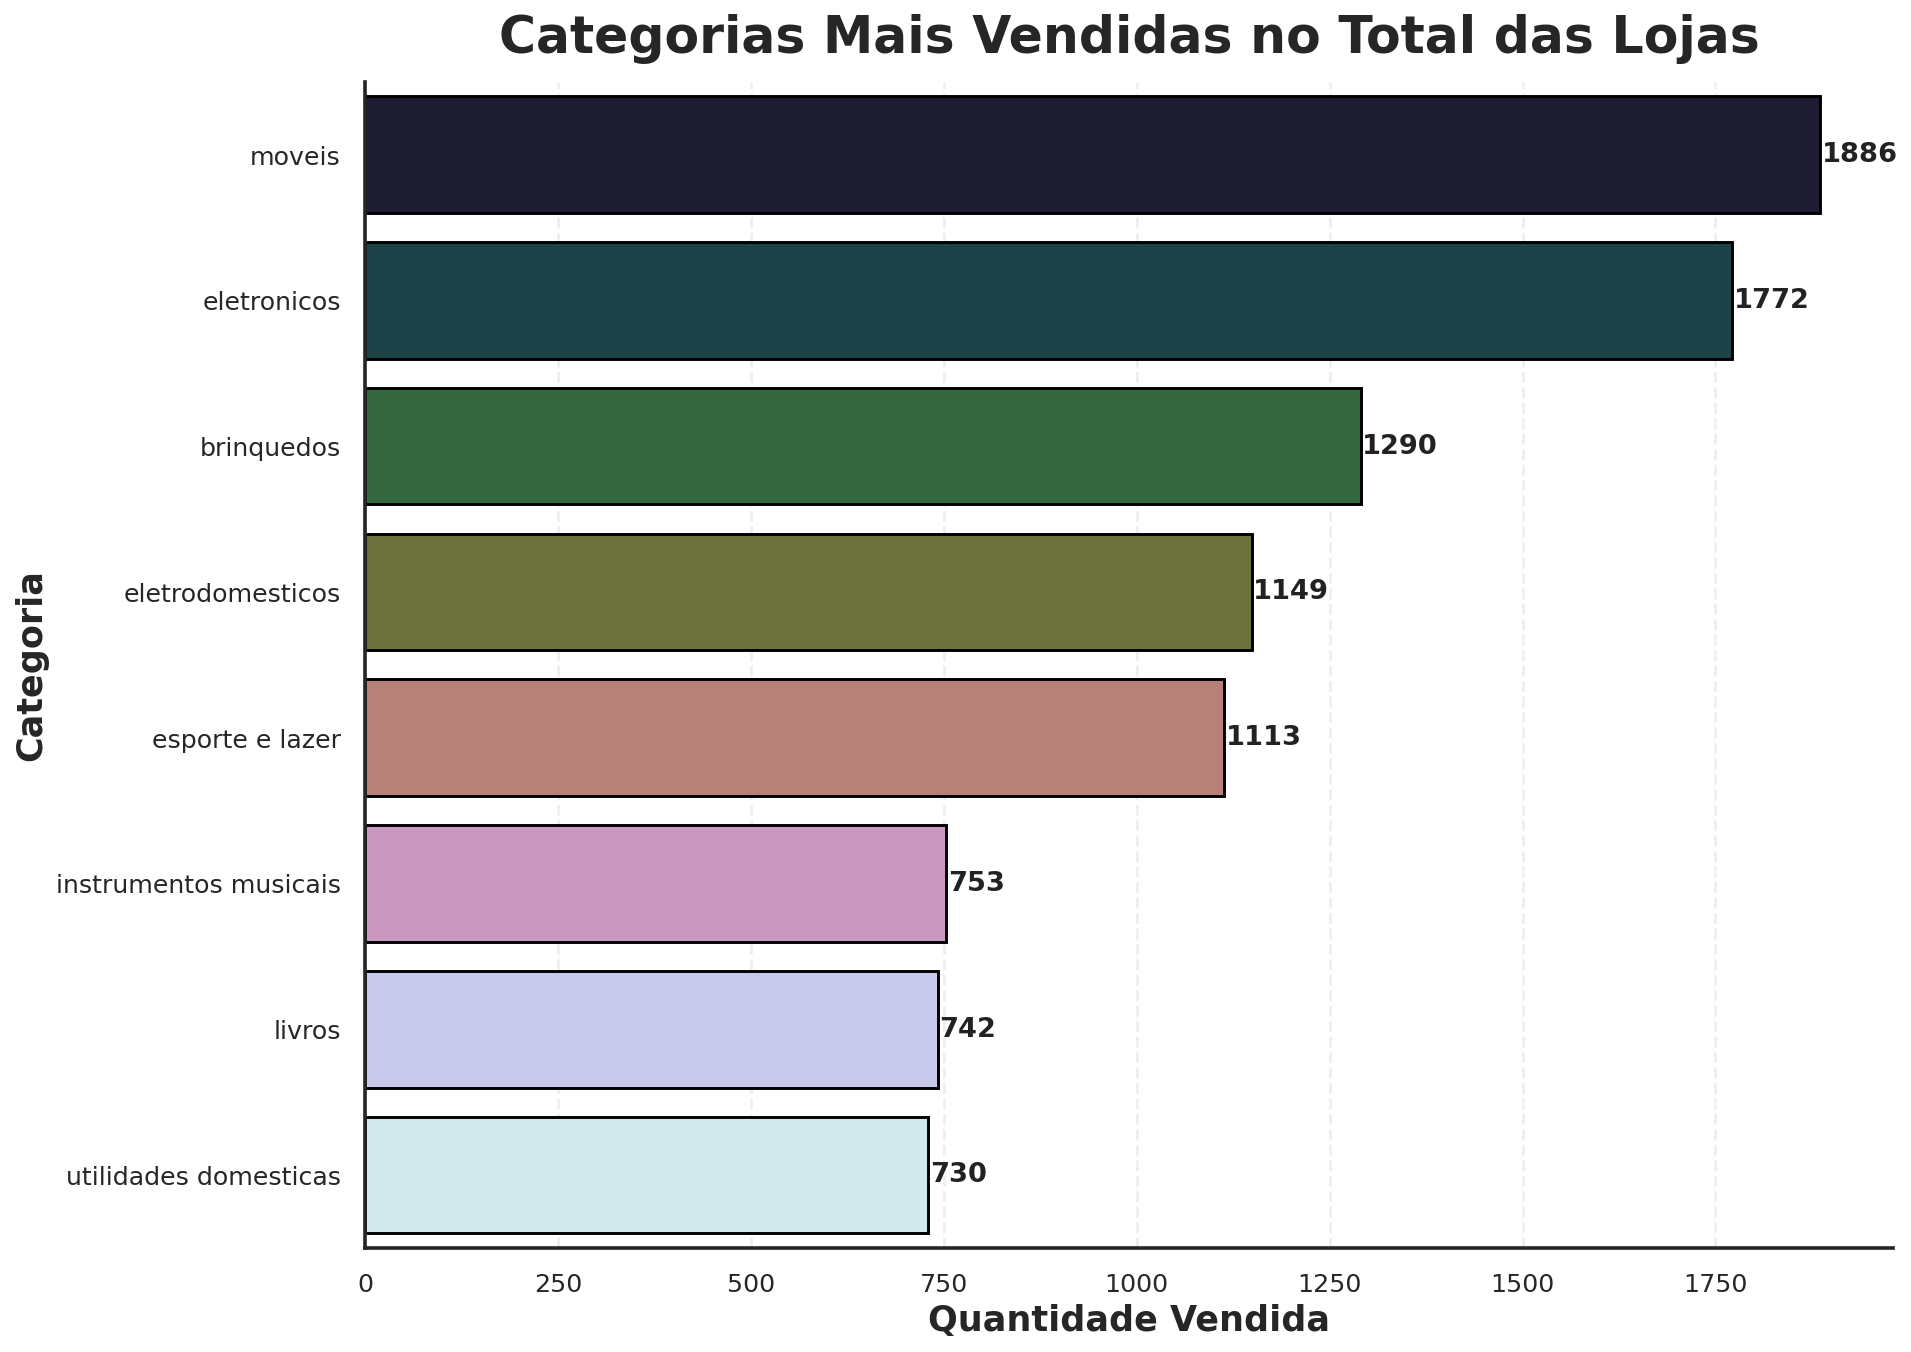

In [18]:
# Conta a quantidade de ocorrências de cada categoria de produto no DataFrame 'df'
# O método 'value_counts()' retorna uma Série, onde o índice é a categoria do produto
# e o valor é a quantidade de vezes que essa categoria aparece no DataFrame.
categorias_geral = df['Categoria do Produto'].value_counts().reset_index()

# Renomeia as colunas da Série resultante para tornar os dados mais legíveis.
# A coluna 'index' é renomeada para 'Categoria', e a coluna com as contagens é renomeada para 'Quantidade Vendida'.
categorias_geral.columns = ['Categoria', 'Quantidade Vendida']

# Ordena o DataFrame pela coluna 'Quantidade Vendida' em ordem decrescente.
# Isso coloca as categorias com maior quantidade vendida no topo, facilitando a análise de desempenho.
categorias_geral = categorias_geral.sort_values(by='Quantidade Vendida', ascending=False)

# Define o tamanho da figura (14x10 polegadas) e a resolução (DPI) do gráfico
plt.figure(figsize=(14, 10), dpi=140)

# Cria o gráfico de barras horizontais
grafico = sns.barplot(
    data=categorias_geral,  # Dados a serem plotados
    y='Categoria',  # Eixo Y: categorias de produtos
    x='Quantidade Vendida',  # Eixo X: quantidade de produtos vendidos
    hue='Categoria',  # Usa a categoria para colorir as barras
    palette='cubehelix',  # Define a paleta de cores para o gráfico
    edgecolor='black',  # Adiciona borda preta às barras para melhorar a visibilidade
    legend=False  # Desativa a legenda, pois as categorias são claramente visíveis no eixo Y
)

# Define o título do gráfico com fonte grande, negrito e espaçamento ajustado
plt.title('Categorias Mais Vendidas no Total das Lojas', fontsize=26, fontweight='bold', pad=15)

# Define o rótulo para o eixo X com fonte negrito e tamanho ajustado
plt.xlabel('Quantidade Vendida', fontsize=18, fontweight='bold')

# Define o rótulo para o eixo Y com fonte negrito e tamanho ajustado
plt.ylabel('Categoria', fontsize=18, fontweight='bold')

# Ajusta o tamanho da fonte dos rótulos do eixo X
plt.xticks(fontsize=13)

# Ajusta o tamanho da fonte dos rótulos do eixo Y
plt.yticks(fontsize=13)

# Adiciona rótulos nas barras com a quantidade de vendas para cada categoria
for bar in grafico.patches:
    valor = bar.get_width()  # Obtém o valor da quantidade vendida (largura da barra)

    # Adiciona o texto (valor de vendas) ao lado de cada barra
    grafico.text(
        valor + 2,  # Posição do texto, ligeiramente à direita da barra
        bar.get_y() + bar.get_height() / 2,  # Posiciona o texto ao centro da barra verticalmente
        f'{int(valor)}',  # Exibe o valor como um número inteiro
        ha='left',  # Alinha o texto à esquerda
        va='center',  # Alinha o texto ao centro verticalmente
        fontsize=14,  # Tamanho da fonte do texto
        fontweight='bold',  # Texto em negrito
        color='#222222'  # Cor do texto (preto)
    )

# Adiciona uma grid apenas no eixo X para melhorar a visualização
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Remove as bordas do gráfico para um design mais limpo
sns.despine()

# Ajusta o layout do gráfico para garantir que tudo esteja posicionado corretamente
plt.tight_layout()

# Exibe o gráfico
plt.show()

##Avaliação das Lojas

---


###Média de Avaliação

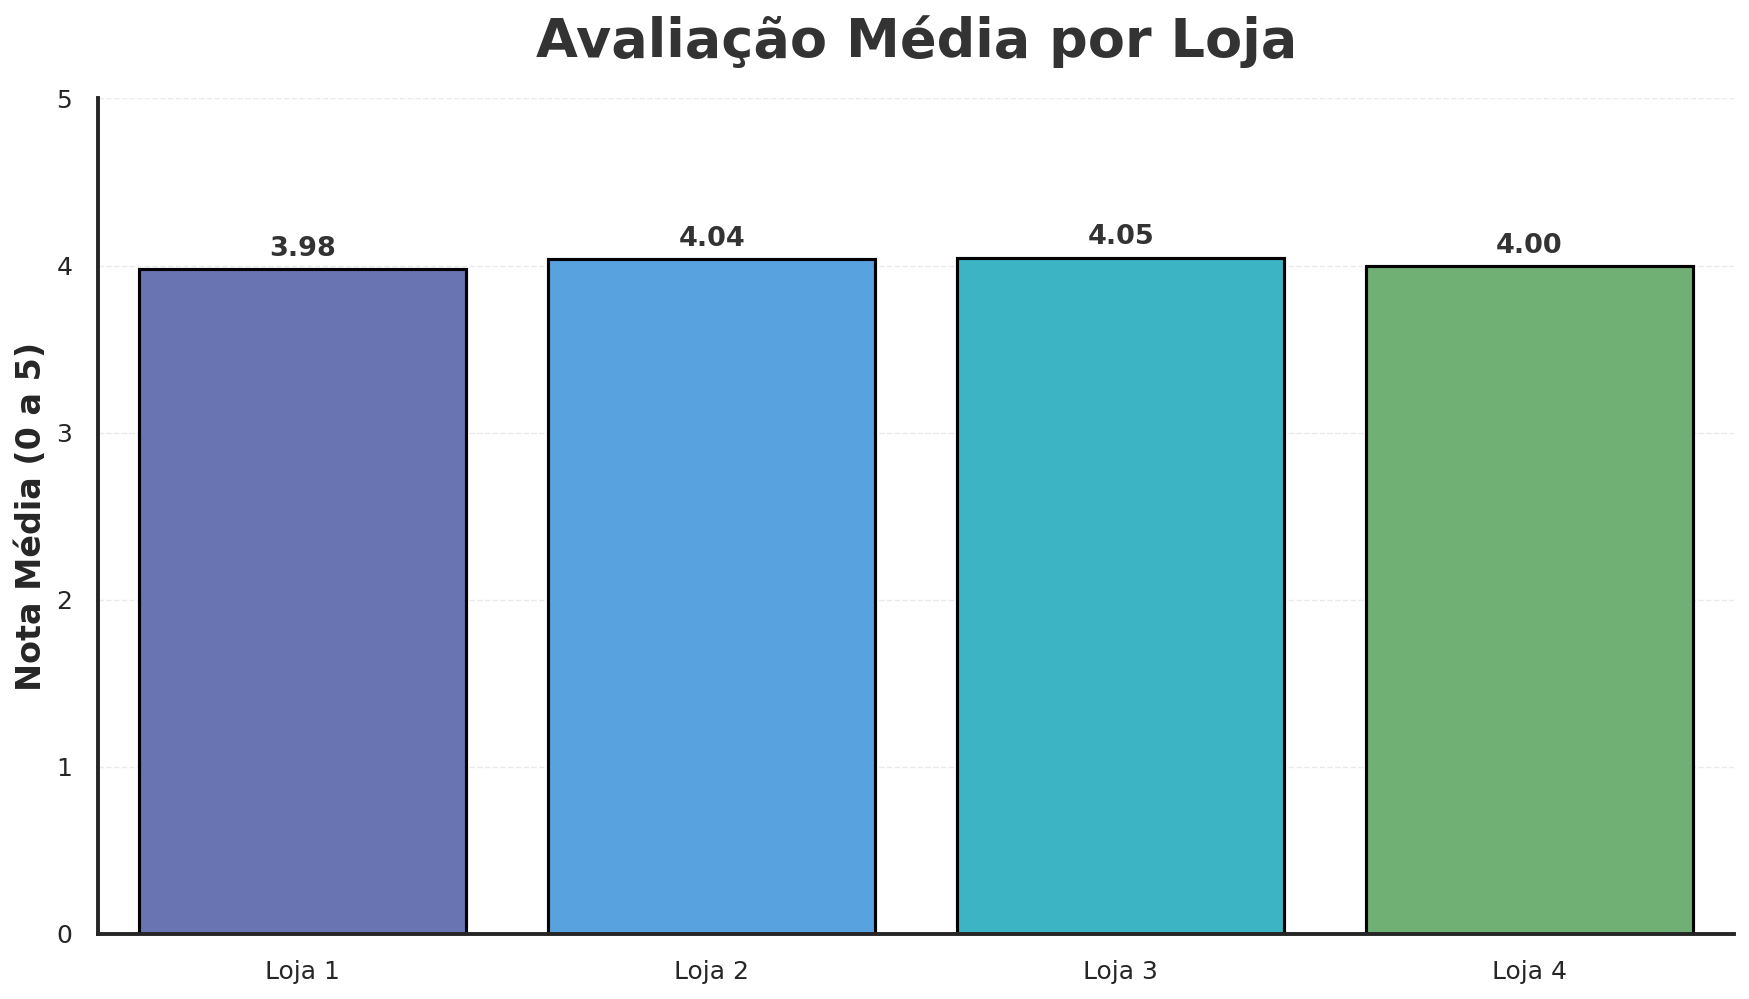

In [21]:
# Agrupar os dados por 'Loja' e calcular a média da 'Avaliação da compra' para cada loja
avaliacoes = df.groupby('Loja')['Avaliação da compra'].mean().reset_index()

# Ordenar as lojas pela 'Avaliação da compra' em ordem decrescente,
# para que as lojas com as melhores avaliações apareçam primeiro
avaliacoes = avaliacoes.sort_values(by='Avaliação da compra', ascending=False)

# Configuração inicial da figura
plt.figure(figsize=(12, 7), dpi=150)  # Define o tamanho da figura (12x7 polegadas) e a resolução (150 dpi)

# Ordenação dos dados para garantir que as lojas apareçam na ordem correta
avaliacoes = avaliacoes.sort_values(by='Loja', ascending=True)  # Ordena os dados pela coluna 'Loja' em ordem crescente

# Definição da paleta de cores personalizada
cores = ['#5C6BC0', '#42A5F5', '#26C6DA', '#66BB6A']  # Especifica as cores das barras usando tons sofisticados (azul royal, azul claro, turquesa, verde)

# Criação do gráfico de barras
grafico = sns.barplot(
    data=avaliacoes,  # DataFrame contendo os dados a serem plotados
    x='Loja',  # Coluna do DataFrame que será plotada no eixo X (Lojas)
    y='Avaliação da compra',  # Coluna do DataFrame que será plotada no eixo Y (Nota média de avaliação)
    hue='Loja',  # 'hue' define as cores das barras de acordo com a coluna 'Loja'
    palette=cores,  # Aplica a paleta de cores definida anteriormente
    edgecolor='black',  # Adiciona uma borda preta nas barras
    legend=False  # Desativa a legenda, pois as lojas já estão indicadas no eixo X
)

# Título do gráfico
plt.title('Avaliação Média por Loja', fontsize=26, fontweight='bold', color='#333', pad=20)  # Título com fonte grande e em negrito

# Configuração dos eixos
plt.ylabel('Nota Média (0 a 5)', fontsize=16, fontweight='bold')  # Rótulo do eixo Y
plt.xlabel('')  # Eixo X não possui rótulo, pois as lojas já estão claramente visíveis
plt.ylim(0, 5)  # Define o limite do eixo Y de 0 a 5, pois a avaliação está na faixa de 0 a 5
plt.yticks(fontsize=12)  # Define o tamanho da fonte dos ticks no eixo Y
plt.xticks(fontsize=12)  # Define o tamanho da fonte dos ticks no eixo X

# Adição de grade horizontal sutil
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.4)  # Linha de grade horizontal para melhorar a legibilidade do gráfico

# Adição de rótulos sobre as barras
for bar in grafico.patches:
    altura = bar.get_height()  # Obtém a altura de cada barra (valor da avaliação média)
    grafico.text(
        bar.get_x() + bar.get_width() / 2,  # Posiciona o rótulo no centro da barra
        altura + 0.08,  # Coloca o rótulo ligeiramente acima da altura da barra
        f'{altura:.2f}',  # Exibe o valor da avaliação média com 2 casas decimais
        ha='center',  # Alinhamento horizontal do texto (centrado)
        fontsize=13,  # Tamanho da fonte
        fontweight='bold',  # Negrito
        color='#333'  # Cor do texto (tom escuro para boa visibilidade)
    )

# Limpeza visual, removendo as bordas superiores e direitas
sns.despine()

# Ajuste final do layout para evitar sobreposição de elementos
plt.tight_layout()

# Exibição do gráfico
plt.show()

##Produtos Mais e Menos Vendidos

---


###10 Produtos Mais e Menos Vendidos

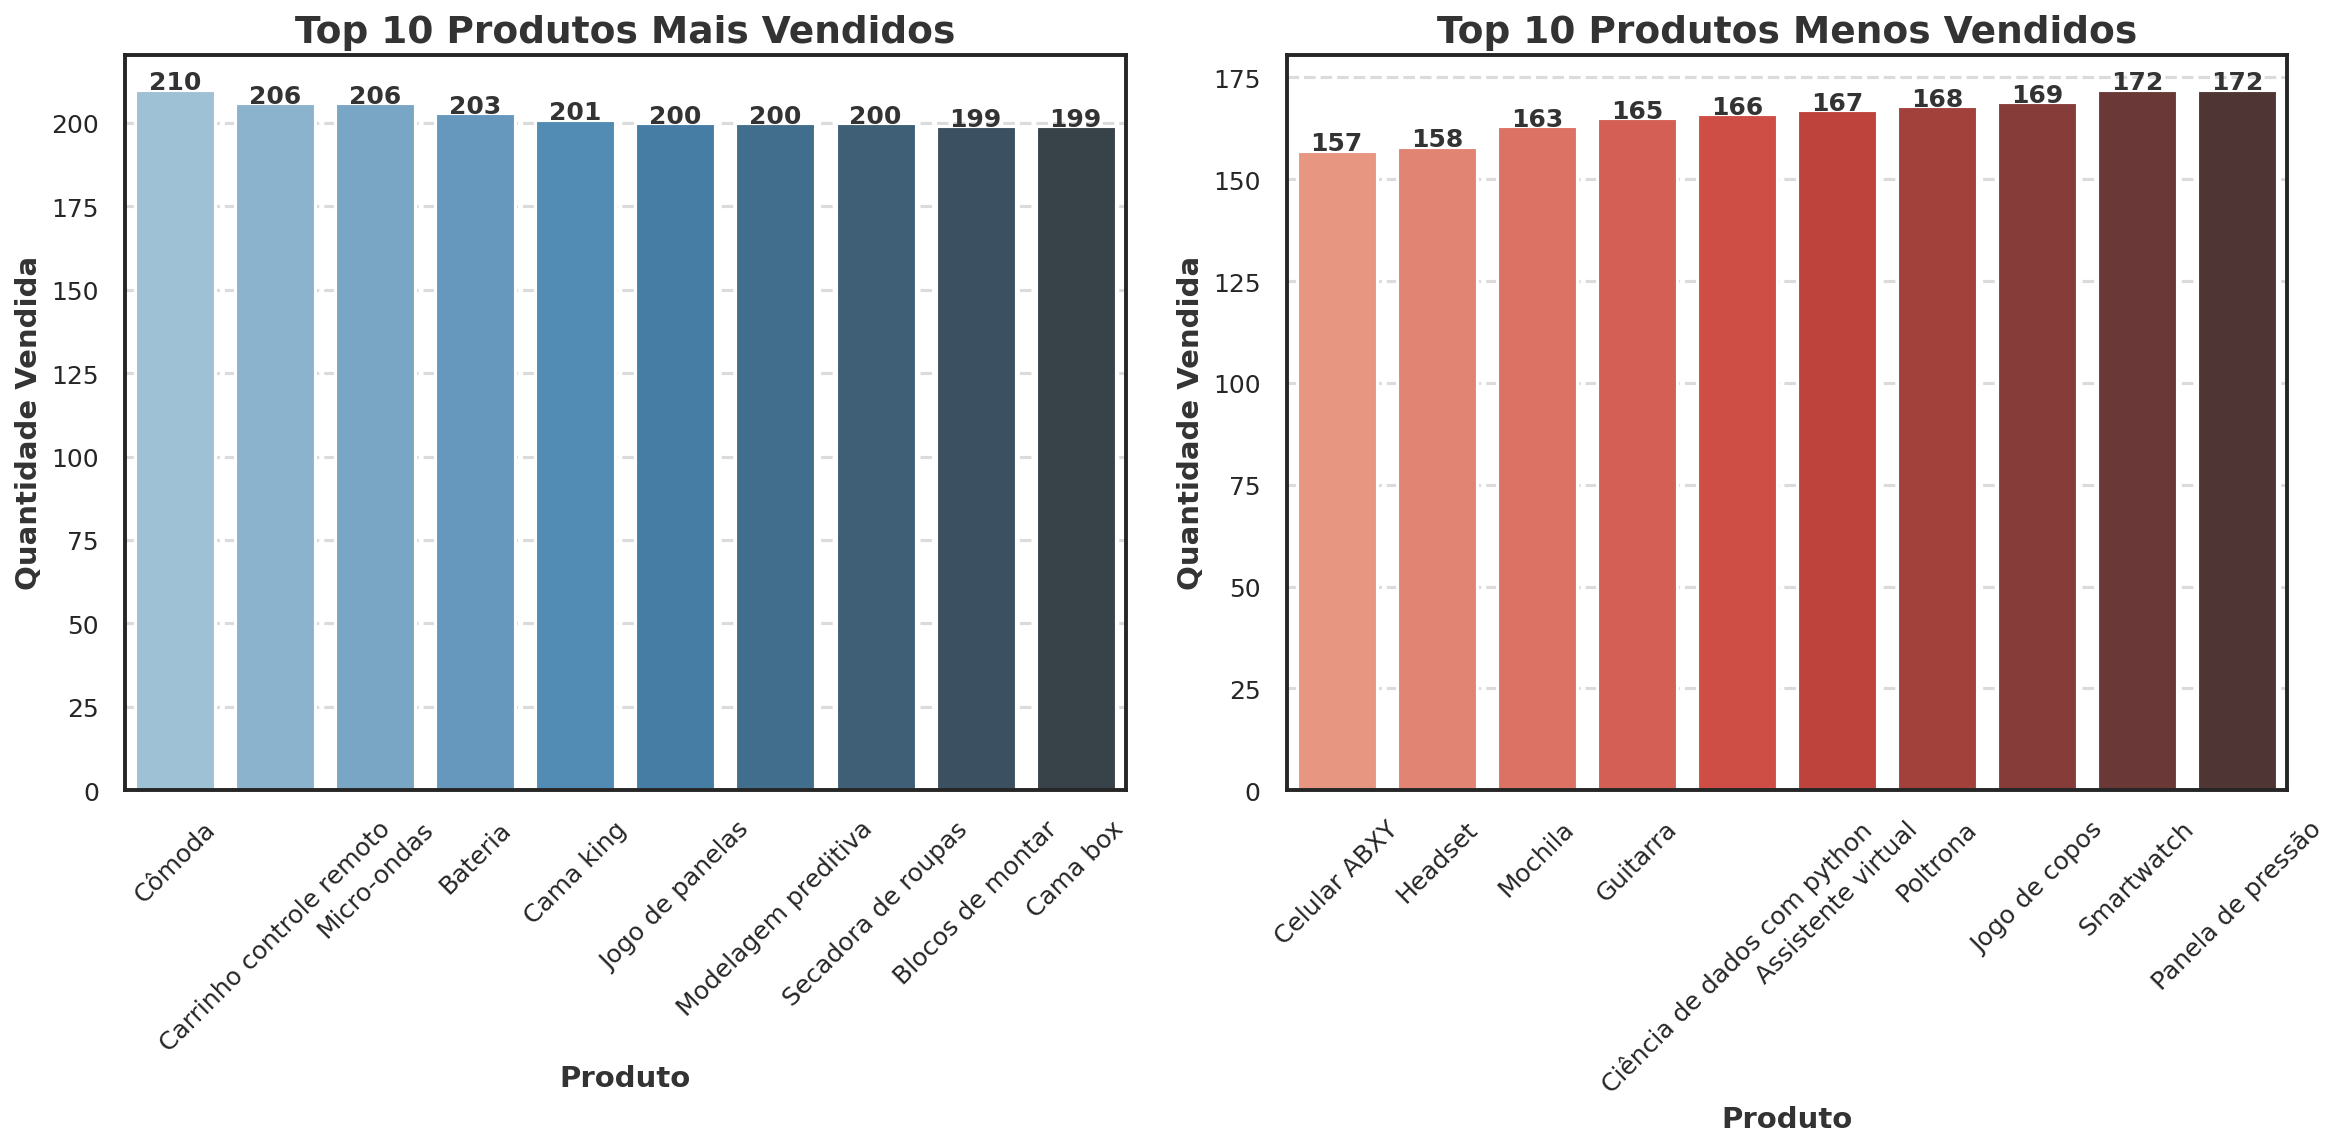

In [23]:
# Agrupa o DataFrame 'df' pela coluna 'Produto' e conta o número de vendas de cada produto
produtos_vendidos = df.groupby('Produto').size().reset_index(name='Quantidade Vendida')

# Ordenar os produtos por quantidade vendida de forma decrescente
# Ordena o DataFrame 'produtos_vendidos' para que os produtos com maior quantidade vendida
# apareçam primeiro na lista
produtos_vendidos = produtos_vendidos.sort_values(by='Quantidade Vendida', ascending=False)

# Seleciona os 10 produtos com maior quantidade vendida
mais_vendidos = produtos_vendidos.nlargest(10, 'Quantidade Vendida')
# Seleciona os 10 produtos com menor quantidade vendida
menos_vendidos = produtos_vendidos.nsmallest(10, 'Quantidade Vendida')

# Criando subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=150)

# Gráfico para os 10 produtos mais vendidos
sns.barplot(data=mais_vendidos, x='Produto', y='Quantidade Vendida', hue='Produto', palette='Blues_d', ax=axes[0], legend=False)
axes[0].set_title('Top 10 Produtos Mais Vendidos', fontsize=18, fontweight='bold', color='#333')
axes[0].set_xlabel('Produto', fontsize=14, fontweight='bold', color='#333')
axes[0].set_ylabel('Quantidade Vendida', fontsize=14, fontweight='bold', color='#333')
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando os valores de quantidade vendida no topo das barras
for bar in axes[0].patches:
    altura = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        altura + 0.05,  # Ajuste da posição do texto
        f'{altura:.0f}',  # Remover casas decimais para valores inteiros
        ha='center',
        fontsize=12,
        fontweight='bold',
        color='#333'
    )

# Gráfico para os 10 produtos menos vendidos
sns.barplot(data=menos_vendidos, x='Produto', y='Quantidade Vendida', hue='Produto', palette='Reds_d', ax=axes[1], legend=False)
axes[1].set_title('Top 10 Produtos Menos Vendidos', fontsize=18, fontweight='bold', color='#333')
axes[1].set_xlabel('Produto', fontsize=14, fontweight='bold', color='#333')
axes[1].set_ylabel('Quantidade Vendida', fontsize=14, fontweight='bold', color='#333')
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando os valores de quantidade vendida no topo das barras
for bar in axes[1].patches:
    altura = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        altura + 0.05,  # Ajuste da posição do texto
        f'{altura:.0f}',  # Remover casas decimais para valores inteiros
        ha='center',
        fontsize=12,
        fontweight='bold',
        color='#333'
    )

# Ajustando o layout para garantir que os gráficos não se sobreponham
plt.tight_layout()

# Exibindo o gráfico
plt.show()

###Correlação de Vendas e Preços

A correlação entre o preço e a quantidade vendida é: 0.15


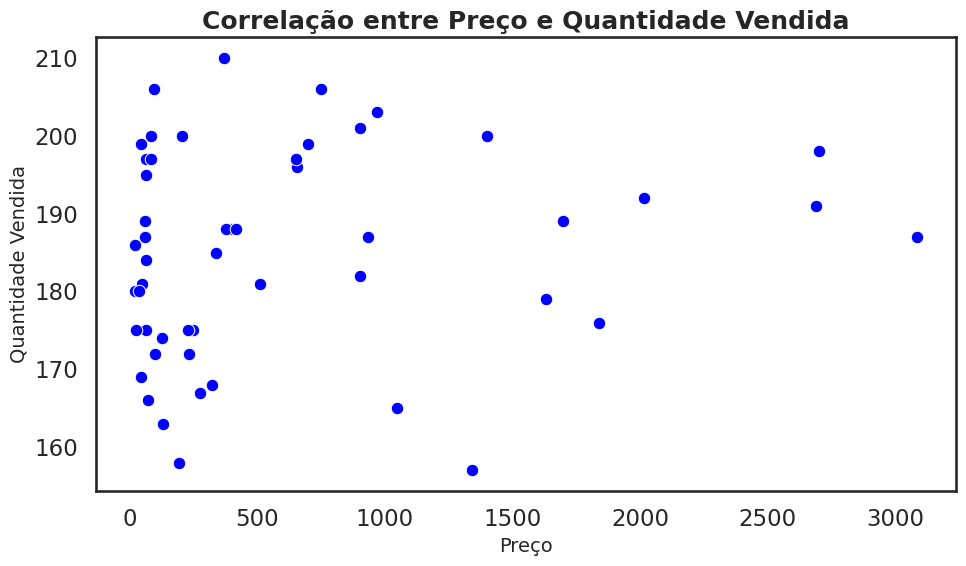

In [24]:
# Agrupar por Produto e contar as ocorrências de cada produto (representando o número de vendas)
# A função groupby() agrupa os dados pela coluna 'Produto', e o método size() conta o número de ocorrências para cada produto,
# o que corresponde ao número de vezes que o produto foi vendido.
# O reset_index() cria um novo DataFrame e renomeia a coluna de contagem para 'Quantidade Vendida'.
produtos_vendidos = df.groupby('Produto').size().reset_index(name='Quantidade Vendida')

# Adicionar o preço ao dataframe de produtos vendidos, utilizando a média do preço por produto
# O groupby() é utilizado novamente, mas agora para calcular a média do preço de cada produto.
# O método mean() calcula a média dos valores da coluna 'Preço' para cada produto.
# O reset_index() cria um novo DataFrame com o preço médio de cada produto.
preco_produto = df.groupby('Produto')['Preço'].mean().reset_index()

# Combinar as informações de vendas e preço
# A função merge() é usada para combinar as informações de 'produtos_vendidos' e 'preco_produto'.
# O parâmetro 'on' especifica que a combinação deve ocorrer com base na coluna 'Produto'.
# O resultado é um DataFrame contendo a quantidade vendida e o preço médio de cada produto.
produtos_vendidos = pd.merge(produtos_vendidos, preco_produto, on='Produto')

# Calcular a correlação entre o preço e a quantidade vendida
# A função corr() calcula a correlação entre as variáveis numéricas do DataFrame.
# Utilizamos iloc[0, 1] para acessar o valor da correlação entre as colunas 'Preço' e 'Quantidade Vendida'.
correlacao = produtos_vendidos[['Preço', 'Quantidade Vendida']].corr().iloc[0, 1]

# Exibir a correlação
# O valor da correlação é exibido com duas casas decimais utilizando f-string.
print(f'A correlação entre o preço e a quantidade vendida é: {correlacao:.2f}')

# Visualização com um gráfico de dispersão
# O gráfico de dispersão é gerado usando a função scatterplot do seaborn.
# O parâmetro 'x' define o eixo X (Preço) e 'y' define o eixo Y (Quantidade Vendida).
# O parâmetro 'color' define a cor dos pontos no gráfico.
plt.figure(figsize=(10, 6))  # Define o tamanho da figura (largura: 10, altura: 6)
sns.scatterplot(data=produtos_vendidos, x='Preço', y='Quantidade Vendida', color='blue')

# Título e rótulos
# A função title() define o título do gráfico e as funções xlabel() e ylabel() definem os rótulos dos eixos X e Y.
plt.title('Correlação entre Preço e Quantidade Vendida', fontsize=18, fontweight='bold')  # Título do gráfico
plt.xlabel('Preço', fontsize=14)  # Rótulo do eixo X
plt.ylabel('Quantidade Vendida', fontsize=14)  # Rótulo do eixo Y

# Exibindo o gráfico
# A função tight_layout() ajusta automaticamente o layout para evitar sobreposição de elementos no gráfico.
plt.tight_layout()
plt.show()  # Exibe o gráfico gerado

##Frete

---


###Frete Médio por Loja

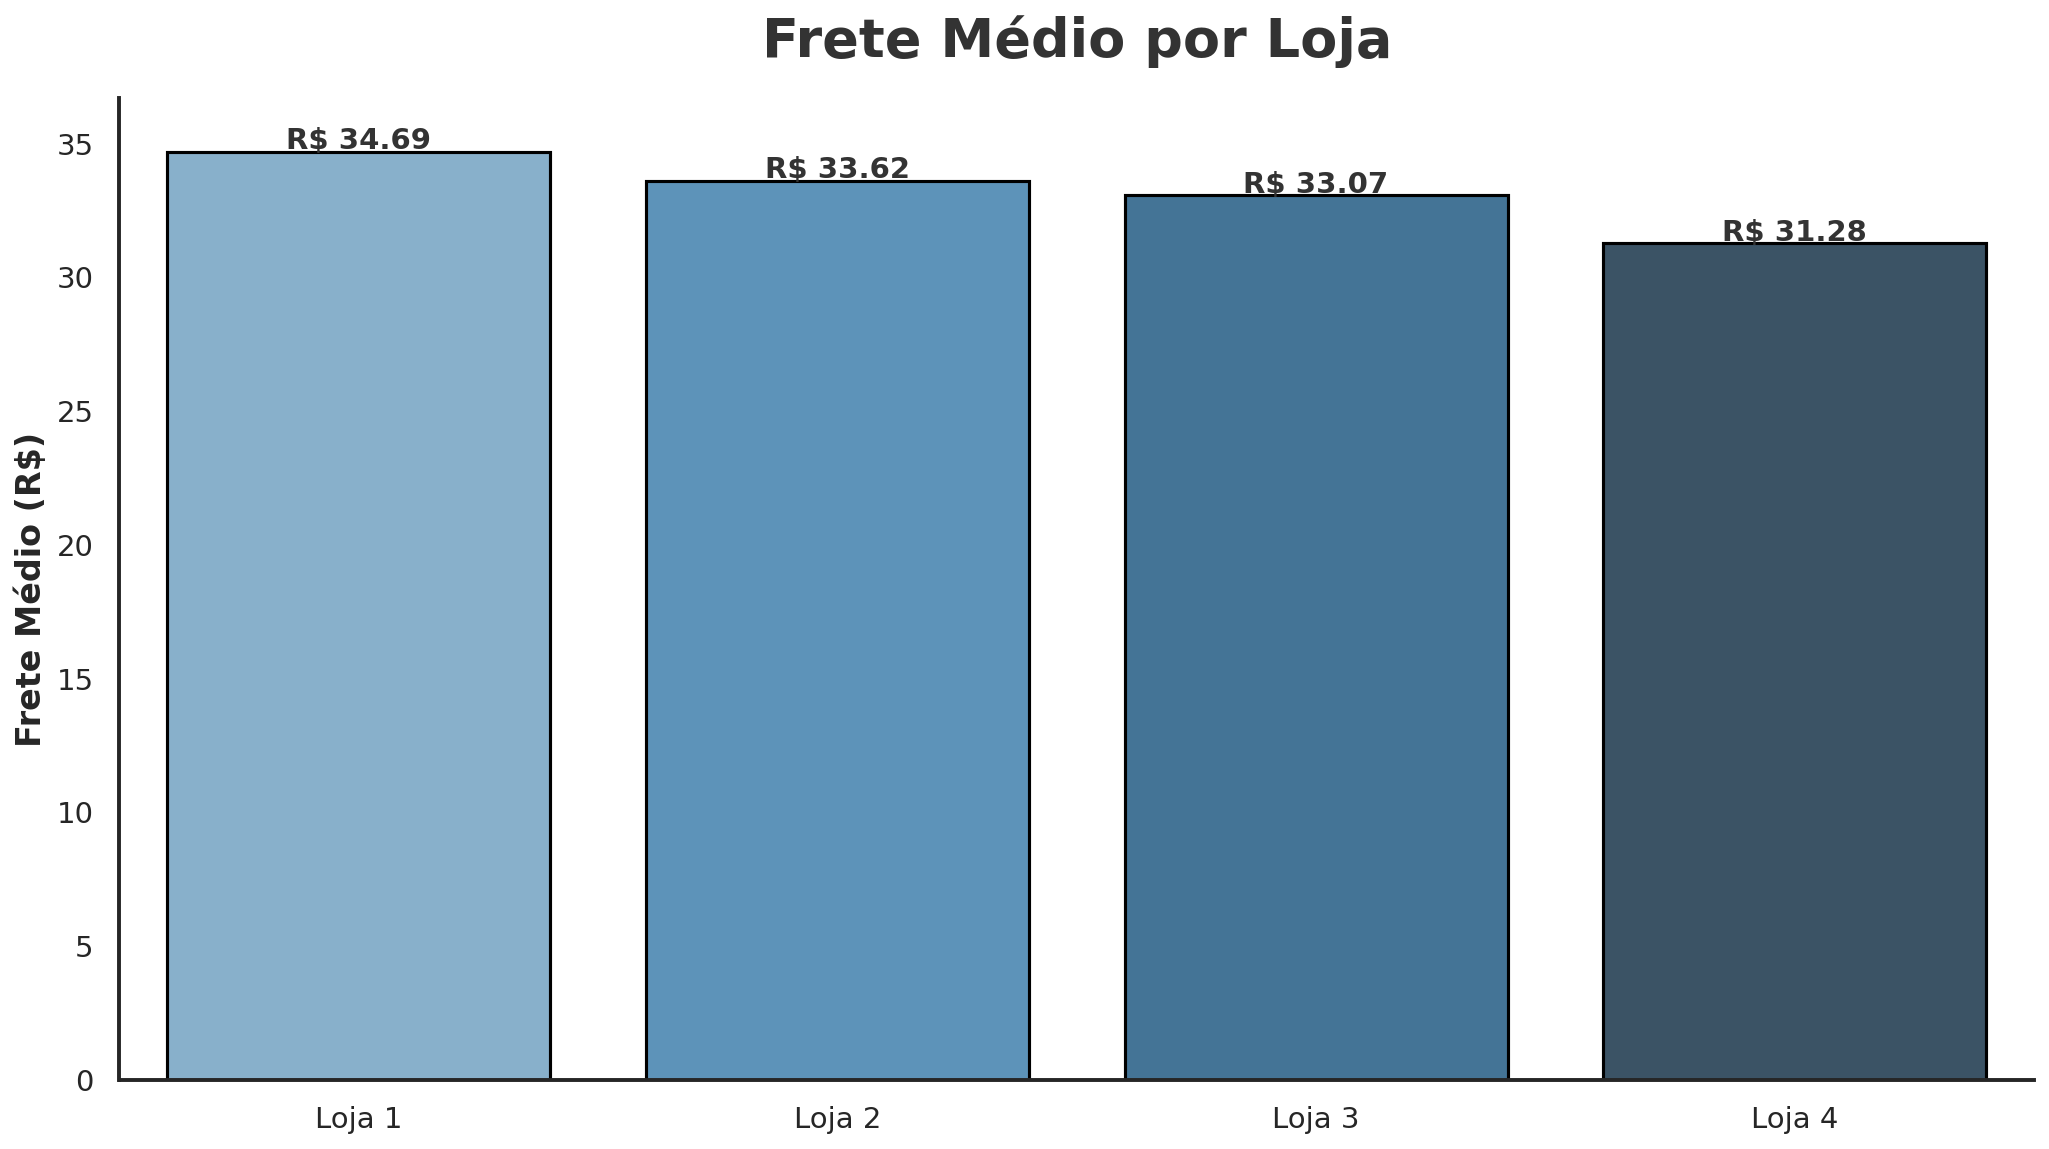

In [25]:
# Calcular o frete médio por loja
# O método 'groupby' agrupa os dados pela coluna 'Loja' e, em seguida, calcula a média da coluna 'Frete' para cada grupo (loja).
# O 'reset_index' reorganiza o índice para garantir que o dataframe resultante tenha índices padrão.
frete_medio_por_loja = df.groupby('Loja')['Frete'].mean().reset_index()

# Definir o tamanho da figura do gráfico (largura x altura) e a resolução
plt.figure(figsize=(14, 8), dpi=150)

# Gráfico de barras para o frete médio por loja
# O gráfico de barras é criado utilizando 'sns.barplot', onde 'data' é o dataframe com os dados do frete médio,
# 'x' é a coluna 'Loja' (categorias para o eixo X) e 'y' é a coluna 'Frete' (valores para o eixo Y).
# O parâmetro 'hue' está sendo utilizado para adicionar uma distinção visual por 'Loja', mas a legenda é desativada com 'legend=False'.
# A paleta 'Blues_d' foi escolhida para um visual mais elegante, e 'edgecolor' define a cor das bordas das barras.
grafico_frete = sns.barplot(
    data=frete_medio_por_loja,
    x='Loja',
    y='Frete',
    hue='Loja',  # Adicionando 'Loja' ao parâmetro 'hue' para evitar o aviso
    palette='Blues_d',  # Usando uma paleta elegante
    edgecolor='black',
    legend=False  # Removendo a legenda, já que 'hue' agora está atribuído
)

# Título e personalizações do gráfico
# O título é configurado com fonte maior, em negrito e uma cor mais escura para destacar. 'pad' define o espaçamento entre o título e o gráfico.
plt.title('Frete Médio por Loja', fontsize=26, fontweight='bold', color='#333', pad=20)

# Remoção do rótulo do eixo X (não será mostrado) e configuração do rótulo do eixo Y, com fonte em negrito.
plt.xlabel('')
plt.ylabel('Frete Médio (R$)', fontsize=16, fontweight='bold')

# Ajustes no tamanho das fontes dos rótulos dos eixos X e Y
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Ajuste do limite superior do eixo Y para garantir que as barras sejam exibidas com um pouco de espaço extra acima delas.
plt.ylim(0, frete_medio_por_loja['Frete'].max() + 2)

# Adicionando rótulos acima das barras para exibir os valores de frete
# Para cada barra do gráfico, o código calcula a altura (valor da barra) e adiciona o texto do valor sobre ela.
# O valor é formatado com 2 casas decimais e centralizado na barra.
for bar in grafico_frete.patches:
    altura = bar.get_height()
    grafico_frete.text(
        bar.get_x() + bar.get_width() / 2,  # Calculando a posição do rótulo (centro da barra)
        altura + 0.1,  # Colocando o rótulo um pouco acima da barra
        f'R$ {altura:.2f}',  # Formatação do valor do frete com duas casas decimais
        ha='center',  # Alinhamento horizontal (centro)
        fontsize=14,
        fontweight='bold',
        color='#333'
    )

# Efeitos visuais
# 'sns.despine()' remove as bordas superior e direita para uma aparência mais limpa e moderna.
sns.despine()

# Ajuste do layout para otimizar o uso do espaço e garantir uma visualização mais compacta e legível.
plt.tight_layout()

# Exibindo o gráfico final
plt.show()

###Distribuição do Frete

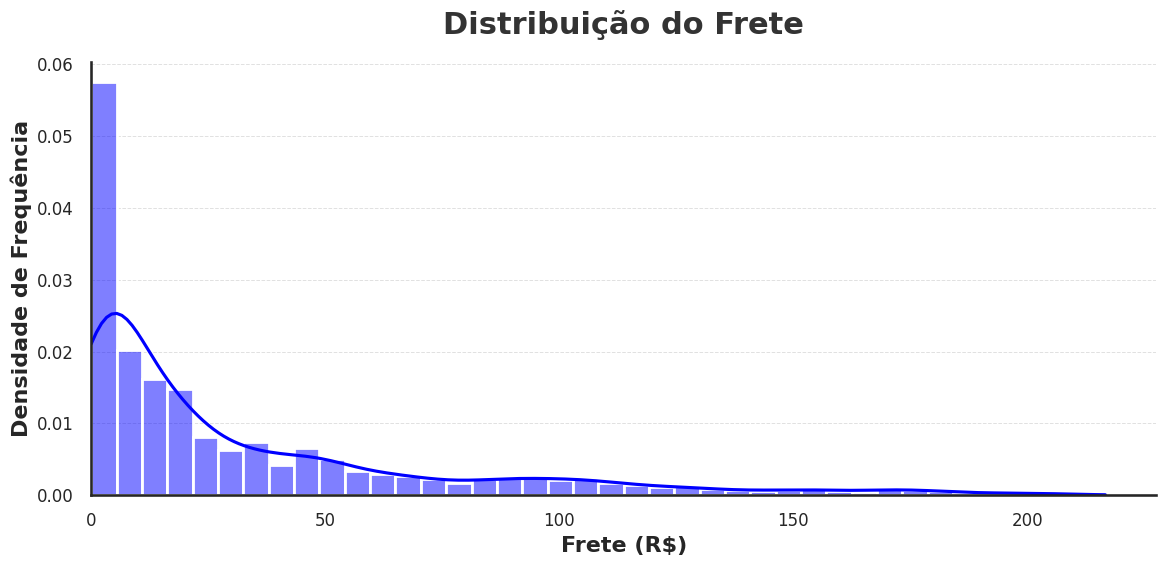

In [26]:
# Definindo o tamanho da figura para melhor visualização
plt.figure(figsize=(12, 6))

# Criando o histograma com linha de densidade e personalizações
sns.histplot(df['Frete'], kde=True, color='blue', bins=40, stat="density", linewidth=2)

# Adicionando título e rótulos aos eixos com mais detalhes e estilos
plt.title('Distribuição do Frete', fontsize=22, fontweight='bold', color='#333', pad=20)
plt.xlabel('Frete (R$)', fontsize=16, fontweight='bold')
plt.ylabel('Densidade de Frequência', fontsize=16, fontweight='bold')

# Ajuste do limite do eixo X para não mostrar valores negativos ou irreais
plt.xlim(left=0)  # Garantir que o eixo X começa em zero

# Ajustando o estilo das legendas e rótulos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Melhorando a estética com grid sutil e uma borda ao redor da figura
sns.despine()  # Remove as bordas superior e direita
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)  # Adicionando uma grade horizontal sutil

# Exibindo o gráfico
plt.tight_layout()
plt.show()

##Localização das Vendas

---

In [27]:
# Criar o mapa centrado em uma coordenada média de latitude e longitude, com o estilo de mapa 'OpenStreetMap'
mapa = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=12, tiles='OpenStreetMap')

# Criar uma lista de coordenadas (latitude e longitude) extraídas do dataframe de vendas
coordenadas = df[['lat', 'lon']].values.tolist()

# Adicionar o mapa de calor (HeatMap) ao mapa, visualizando a distribuição geográfica das vendas
heatmap = HeatMap(
    coordenadas,  # Passa a lista de coordenadas de latitude e longitude para o mapa de calor
    min_opacity=0.2,  # Define a opacidade mínima das áreas de menor intensidade
    max_opacity=0.8,  # Define a opacidade máxima das áreas de maior intensidade
    radius=15,  # Define o tamanho dos círculos do mapa de calor
    blur=10,  # Aplica um desfoque aos círculos para suavizar a transição entre as áreas de calor
    max_zoom=13  # Limita o nível máximo de zoom para evitar o detalhamento excessivo do mapa
)

# Adicionar o mapa de calor ao mapa principal
heatmap.add_to(mapa)

# Adicionar controle de camadas ao mapa, permitindo ao usuário alternar entre diferentes camadas de mapa
folium.LayerControl().add_to(mapa)

# Exibir o mapa com a visualização do mapa de calor
mapa

#Discussão Dos Resultados

---

## Relatório de Análise: Decisão de Venda das Lojas Alura Store

### Objetivo

Este relatório tem como objetivo ajudar o Senhor João a decidir qual loja da sua rede Alura Store deve ser vendida. Para isso, realizamos uma análise detalhada do desempenho das lojas, levando em consideração os seguintes fatores:

- Faturamento total das lojas
- Categorias de produtos mais e menos vendidas
- Média das avaliações dos clientes por loja
- Produtos mais e menos vendidos
- Frete médio de cada loja

Baseado nos dados coletados e nas visualizações geradas, será feita uma recomendação clara sobre qual loja apresentar melhores condições para ser vendida.

---

### Análise dos Indicadores

#### 1. Faturamento Total

O faturamento total é um indicador chave para medir o desempenho financeiro de cada loja. A **Loja 1** se destacou com o maior faturamento, gerando **R\$ 1.534.509,12**, seguida pela **Loja 2**, **Loja 3** e **Loja 4**, que teve o menor faturamento com **R\$ 1.384.497,58**. A diferença de aproximadamente **9,78%** entre a Loja 1 e a Loja 4 sugere que a Loja 4 tem um desempenho financeiro inferior, o que pode ser um sinal de que seu mercado é menos lucrativo ou de que ela apresenta desafios no crescimento das vendas.

#### 2. Vendas por Categorias de Produtos

A análise das categorias de produtos mais e menos vendidas revela informações importantes sobre a performance do portfólio de produtos. As categorias mais vendidas nas lojas geralmente estão alinhadas com as tendências de consumo, enquanto as menos vendidas indicam áreas onde o desempenho é baixo. Com isso, podemos identificar pontos fortes e fracos em cada loja, como a popularidade de certos produtos que podem impactar no faturamento e na satisfação dos clientes.

#### 3. Média das Avaliações dos Clientes

A **Loja 3** obteve a melhor média de avaliação, com **4,05**, seguida de perto pela **Loja 2** com **4,04**. Essas lojas se destacam pela alta satisfação dos clientes, o que pode indicar um atendimento de qualidade e uma boa experiência de compra. A **Loja 1** obteve uma avaliação média de **3,98**, que, embora ainda positiva, está abaixo das demais. A **Loja 4**, com uma avaliação de **4,00**, apresenta um desempenho mediano nesse quesito.

#### 4. Produtos Mais e Menos Vendidos

Os produtos mais vendidos são indicadores importantes para entender o que atrai mais os consumidores em cada loja. Identificar quais produtos têm uma boa saída ajuda a entender os pontos fortes da loja, enquanto os produtos menos vendidos podem indicar uma necessidade de revisão no portfólio, seja por questões de demanda ou marketing.

#### 5. Frete Médio

O **frete médio** de cada loja também tem um impacto direto na decisão de compra dos consumidores. A **Loja 4** se destaca com o **menor frete médio**, com **R\$ 31,28**, o que pode ser um atrativo para os clientes que buscam economizar no custo de envio. No entanto, apesar desse ponto positivo, a Loja 4 apresenta o menor faturamento, o que sugere que seu custo de frete não foi suficiente para atrair um volume significativo de vendas.

---

### Conclusão e Recomendação

Com base nas análises e nas visualizações geradas, podemos concluir que, apesar da **Loja 4** ter o menor custo de frete, ela apresenta o menor faturamento e não se destaca positivamente em termos de avaliação dos clientes. Isso indica que, embora o custo de frete seja uma vantagem, a loja não possui o mesmo potencial de crescimento e atratividade que as outras.

Por outro lado, a **Loja 1** tem o maior faturamento, o que a torna uma das opções mais atrativas, embora tenha o maior custo de frete. No entanto, a **Loja 3** se destaca pela melhor avaliação dos clientes e um bom desempenho no faturamento, sendo uma opção com excelente potencial de crescimento e alta satisfação dos consumidores.

**Recomendação Final:**  
Considerando o desempenho geral das lojas, a **Loja 4** deve ser a loja recomendada para venda. Apesar do custo de frete mais baixo, seu faturamento e avaliação abaixo da média indicam que ela não tem o mesmo potencial das outras lojas. As Lojas 1 e 3 apresentam um desempenho financeiro mais forte e uma maior satisfação dos clientes, o que as torna mais estratégicas para o futuro da Alura Store.